In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import json

In [2]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [3]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [4]:
objectDetection_url =  vision_base_url + 'detect'

In [5]:
object_image ='https://images.unsplash.com/photo-1517732306149-e8f829eb588a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NXx8Y3Jvd2R8ZW58MHx8MHx8&auto=format&fit=crop&w=400&q=60'

In [6]:
img = Image.open(BytesIO(requests.get(object_image).content))

In [7]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
data = {'url':object_image}   

In [8]:
response = requests.post(objectDetection_url,
                        headers = headers,
                        json = data)

In [9]:
detectionResult = response.json()

In [10]:
detectionResult

{'objects': [{'rectangle': {'x': 38, 'y': 47, 'w': 52, 'h': 128},
   'object': 'person',
   'confidence': 0.761},
  {'rectangle': {'x': 99, 'y': 45, 'w': 37, 'h': 109},
   'object': 'person',
   'confidence': 0.733},
  {'rectangle': {'x': 169, 'y': 52, 'w': 39, 'h': 92},
   'object': 'person',
   'confidence': 0.679}],
 'requestId': '1a45d739-f9ae-4889-8d8b-7f7b65545484',
 'metadata': {'height': 266, 'width': 400, 'format': 'Jpeg'}}

In [11]:
from PIL import Image, ImageDraw, ImageFont

In [12]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
    
    rect=obj['rectangle']
    
    x=rect['x']
    y=rect['y']
    w=rect['w']
    h=rect['h']
    
    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    objectName = obj['object']
    draw.text((x,y),objectName,fill='blue')

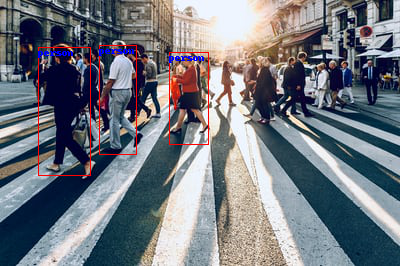

In [13]:
img